In [1]:
import os
import numpy as np
import pandas as pd
import copy
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("MVSA-Single/MVSA_Single/labelResultAll.txt")

In [3]:
df.tail()

,ID\ttext,image
4864,5125\tneutral,positive
4865,5126\tpositive,neutral
4866,5127\tpositive,positive
4867,5128\tneutral,positive
4868,5129\tpositive,positive


In [4]:
file = []
text = []
for i in df["ID\ttext"]:
    num = ""
    string = ""
    for j in i.split("\t"):
        if j.isdigit():
            num = num+j
        else:
            string = string+j
            
    file.append(num)
    text.append(string)

print(file)
print(text)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '

In [5]:
data = pd.DataFrame(file, columns=['File'])
data

,File
0,1
1,2
2,3
3,4
4,5
...,...
4864,5125
4865,5126
4866,5127
4867,5128


In [6]:
data["text"] = text

In [7]:
data

,File,text
0,1,neutral
1,2,neutral
2,3,neutral
3,4,positive
4,5,positive
...,...,...
4864,5125,neutral
4865,5126,positive
4866,5127,positive
4867,5128,neutral


In [8]:
data["image"] = df["image"]
data

,File,text,image
0,1,neutral,positive
1,2,neutral,positive
2,3,neutral,positive
3,4,positive,positive
4,5,positive,positive
...,...,...,...
4864,5125,neutral,positive
4865,5126,positive,neutral
4866,5127,positive,positive
4867,5128,neutral,positive


In [9]:
img = []
txt = []
for i in data["File"]:
    img.append("MVSA-Single/MVSA_Single/data/"+i+".jpg")
    txt.append("MVSA-Single/MVSA_Single/data/"+i+".txt")

print(img)
print(txt)

['MVSA-Single/MVSA_Single/data/1.jpg', 'MVSA-Single/MVSA_Single/data/2.jpg', 'MVSA-Single/MVSA_Single/data/3.jpg', 'MVSA-Single/MVSA_Single/data/4.jpg', 'MVSA-Single/MVSA_Single/data/5.jpg', 'MVSA-Single/MVSA_Single/data/6.jpg', 'MVSA-Single/MVSA_Single/data/7.jpg', 'MVSA-Single/MVSA_Single/data/8.jpg', 'MVSA-Single/MVSA_Single/data/9.jpg', 'MVSA-Single/MVSA_Single/data/10.jpg', 'MVSA-Single/MVSA_Single/data/11.jpg', 'MVSA-Single/MVSA_Single/data/12.jpg', 'MVSA-Single/MVSA_Single/data/13.jpg', 'MVSA-Single/MVSA_Single/data/14.jpg', 'MVSA-Single/MVSA_Single/data/15.jpg', 'MVSA-Single/MVSA_Single/data/16.jpg', 'MVSA-Single/MVSA_Single/data/17.jpg', 'MVSA-Single/MVSA_Single/data/18.jpg', 'MVSA-Single/MVSA_Single/data/19.jpg', 'MVSA-Single/MVSA_Single/data/20.jpg', 'MVSA-Single/MVSA_Single/data/21.jpg', 'MVSA-Single/MVSA_Single/data/22.jpg', 'MVSA-Single/MVSA_Single/data/23.jpg', 'MVSA-Single/MVSA_Single/data/24.jpg', 'MVSA-Single/MVSA_Single/data/25.jpg', 'MVSA-Single/MVSA_Single/data/26.

In [10]:
data['img_path'] = img
data['txt_path'] = txt
data

,File,text,image,img_path,txt_path
0,1,neutral,positive,MVSA-Single/MVSA_Single/data/1.jpg,MVSA-Single/MVSA_Single/data/1.txt
1,2,neutral,positive,MVSA-Single/MVSA_Single/data/2.jpg,MVSA-Single/MVSA_Single/data/2.txt
2,3,neutral,positive,MVSA-Single/MVSA_Single/data/3.jpg,MVSA-Single/MVSA_Single/data/3.txt
3,4,positive,positive,MVSA-Single/MVSA_Single/data/4.jpg,MVSA-Single/MVSA_Single/data/4.txt
4,5,positive,positive,MVSA-Single/MVSA_Single/data/5.jpg,MVSA-Single/MVSA_Single/data/5.txt
...,...,...,...,...,...
4864,5125,neutral,positive,MVSA-Single/MVSA_Single/data/5125.jpg,MVSA-Single/MVSA_Single/data/5125.txt
4865,5126,positive,neutral,MVSA-Single/MVSA_Single/data/5126.jpg,MVSA-Single/MVSA_Single/data/5126.txt
4866,5127,positive,positive,MVSA-Single/MVSA_Single/data/5127.jpg,MVSA-Single/MVSA_Single/data/5127.txt
4867,5128,neutral,positive,MVSA-Single/MVSA_Single/data/5128.jpg,MVSA-Single/MVSA_Single/data/5128.txt


In [11]:
lab = []
for i, t in enumerate(data['text']):
    if(data.iat[i, 2] == t):
        lab.append(t)
    elif(t == 'neutral'):
        lab.append(data.iat[i, 2])
    elif(data.iat[i, 2] == 'neutral'):
        lab.append(t)
    else:
        lab.append('X')

In [12]:
print(lab)

['positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'positive', 'negative', 'positive', 'positive', 'neutral', 'positive', 'positive', 'positive', 'X', 'positive', 'neutral', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'neutral', 'positive', 'positive', 'positive', 'X', 'positive', 'negative', 'positive', 'positive', 'negative', 'neutral', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'neutral', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'neutral', 'po

In [13]:
len(lab)

4869

In [14]:
data['lab'] = lab
data

,File,text,image,img_path,txt_path,lab
0,1,neutral,positive,MVSA-Single/MVSA_Single/data/1.jpg,MVSA-Single/MVSA_Single/data/1.txt,positive
1,2,neutral,positive,MVSA-Single/MVSA_Single/data/2.jpg,MVSA-Single/MVSA_Single/data/2.txt,positive
2,3,neutral,positive,MVSA-Single/MVSA_Single/data/3.jpg,MVSA-Single/MVSA_Single/data/3.txt,positive
3,4,positive,positive,MVSA-Single/MVSA_Single/data/4.jpg,MVSA-Single/MVSA_Single/data/4.txt,positive
4,5,positive,positive,MVSA-Single/MVSA_Single/data/5.jpg,MVSA-Single/MVSA_Single/data/5.txt,positive
...,...,...,...,...,...,...
4864,5125,neutral,positive,MVSA-Single/MVSA_Single/data/5125.jpg,MVSA-Single/MVSA_Single/data/5125.txt,positive
4865,5126,positive,neutral,MVSA-Single/MVSA_Single/data/5126.jpg,MVSA-Single/MVSA_Single/data/5126.txt,positive
4866,5127,positive,positive,MVSA-Single/MVSA_Single/data/5127.jpg,MVSA-Single/MVSA_Single/data/5127.txt,positive
4867,5128,neutral,positive,MVSA-Single/MVSA_Single/data/5128.jpg,MVSA-Single/MVSA_Single/data/5128.txt,positive


In [15]:
data = data[data['lab'] != 'X']
data

,File,text,image,img_path,txt_path,lab
0,1,neutral,positive,MVSA-Single/MVSA_Single/data/1.jpg,MVSA-Single/MVSA_Single/data/1.txt,positive
1,2,neutral,positive,MVSA-Single/MVSA_Single/data/2.jpg,MVSA-Single/MVSA_Single/data/2.txt,positive
2,3,neutral,positive,MVSA-Single/MVSA_Single/data/3.jpg,MVSA-Single/MVSA_Single/data/3.txt,positive
3,4,positive,positive,MVSA-Single/MVSA_Single/data/4.jpg,MVSA-Single/MVSA_Single/data/4.txt,positive
4,5,positive,positive,MVSA-Single/MVSA_Single/data/5.jpg,MVSA-Single/MVSA_Single/data/5.txt,positive
...,...,...,...,...,...,...
4864,5125,neutral,positive,MVSA-Single/MVSA_Single/data/5125.jpg,MVSA-Single/MVSA_Single/data/5125.txt,positive
4865,5126,positive,neutral,MVSA-Single/MVSA_Single/data/5126.jpg,MVSA-Single/MVSA_Single/data/5126.txt,positive
4866,5127,positive,positive,MVSA-Single/MVSA_Single/data/5127.jpg,MVSA-Single/MVSA_Single/data/5127.txt,positive
4867,5128,neutral,positive,MVSA-Single/MVSA_Single/data/5128.jpg,MVSA-Single/MVSA_Single/data/5128.txt,positive


In [16]:
data.reset_index(inplace = True)
data

,index,File,text,image,img_path,txt_path,lab
0,0,1,neutral,positive,MVSA-Single/MVSA_Single/data/1.jpg,MVSA-Single/MVSA_Single/data/1.txt,positive
1,1,2,neutral,positive,MVSA-Single/MVSA_Single/data/2.jpg,MVSA-Single/MVSA_Single/data/2.txt,positive
2,2,3,neutral,positive,MVSA-Single/MVSA_Single/data/3.jpg,MVSA-Single/MVSA_Single/data/3.txt,positive
3,3,4,positive,positive,MVSA-Single/MVSA_Single/data/4.jpg,MVSA-Single/MVSA_Single/data/4.txt,positive
4,4,5,positive,positive,MVSA-Single/MVSA_Single/data/5.jpg,MVSA-Single/MVSA_Single/data/5.txt,positive
...,...,...,...,...,...,...,...
4506,4864,5125,neutral,positive,MVSA-Single/MVSA_Single/data/5125.jpg,MVSA-Single/MVSA_Single/data/5125.txt,positive
4507,4865,5126,positive,neutral,MVSA-Single/MVSA_Single/data/5126.jpg,MVSA-Single/MVSA_Single/data/5126.txt,positive
4508,4866,5127,positive,positive,MVSA-Single/MVSA_Single/data/5127.jpg,MVSA-Single/MVSA_Single/data/5127.txt,positive
4509,4867,5128,neutral,positive,MVSA-Single/MVSA_Single/data/5128.jpg,MVSA-Single/MVSA_Single/data/5128.txt,positive


In [17]:
data.drop(['index'], axis=1, inplace=True)
data

,File,text,image,img_path,txt_path,lab
0,1,neutral,positive,MVSA-Single/MVSA_Single/data/1.jpg,MVSA-Single/MVSA_Single/data/1.txt,positive
1,2,neutral,positive,MVSA-Single/MVSA_Single/data/2.jpg,MVSA-Single/MVSA_Single/data/2.txt,positive
2,3,neutral,positive,MVSA-Single/MVSA_Single/data/3.jpg,MVSA-Single/MVSA_Single/data/3.txt,positive
3,4,positive,positive,MVSA-Single/MVSA_Single/data/4.jpg,MVSA-Single/MVSA_Single/data/4.txt,positive
4,5,positive,positive,MVSA-Single/MVSA_Single/data/5.jpg,MVSA-Single/MVSA_Single/data/5.txt,positive
...,...,...,...,...,...,...
4506,5125,neutral,positive,MVSA-Single/MVSA_Single/data/5125.jpg,MVSA-Single/MVSA_Single/data/5125.txt,positive
4507,5126,positive,neutral,MVSA-Single/MVSA_Single/data/5126.jpg,MVSA-Single/MVSA_Single/data/5126.txt,positive
4508,5127,positive,positive,MVSA-Single/MVSA_Single/data/5127.jpg,MVSA-Single/MVSA_Single/data/5127.txt,positive
4509,5128,neutral,positive,MVSA-Single/MVSA_Single/data/5128.jpg,MVSA-Single/MVSA_Single/data/5128.txt,positive


In [18]:
data.drop(['File', 'text', 'image'], axis=1, inplace=True)
data

,img_path,txt_path,lab
0,MVSA-Single/MVSA_Single/data/1.jpg,MVSA-Single/MVSA_Single/data/1.txt,positive
1,MVSA-Single/MVSA_Single/data/2.jpg,MVSA-Single/MVSA_Single/data/2.txt,positive
2,MVSA-Single/MVSA_Single/data/3.jpg,MVSA-Single/MVSA_Single/data/3.txt,positive
3,MVSA-Single/MVSA_Single/data/4.jpg,MVSA-Single/MVSA_Single/data/4.txt,positive
4,MVSA-Single/MVSA_Single/data/5.jpg,MVSA-Single/MVSA_Single/data/5.txt,positive
...,...,...,...
4506,MVSA-Single/MVSA_Single/data/5125.jpg,MVSA-Single/MVSA_Single/data/5125.txt,positive
4507,MVSA-Single/MVSA_Single/data/5126.jpg,MVSA-Single/MVSA_Single/data/5126.txt,positive
4508,MVSA-Single/MVSA_Single/data/5127.jpg,MVSA-Single/MVSA_Single/data/5127.txt,positive
4509,MVSA-Single/MVSA_Single/data/5128.jpg,MVSA-Single/MVSA_Single/data/5128.txt,positive


In [19]:
lab = []
for i in data['lab']:
    if(i == 'neutral'):
        lab.append(0)
    elif(i == 'positive'):
        lab.append(1)
    else:
        lab.append(2)

print(lab)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 

In [20]:
data['lab'] = lab
data

,img_path,txt_path,lab
0,MVSA-Single/MVSA_Single/data/1.jpg,MVSA-Single/MVSA_Single/data/1.txt,1
1,MVSA-Single/MVSA_Single/data/2.jpg,MVSA-Single/MVSA_Single/data/2.txt,1
2,MVSA-Single/MVSA_Single/data/3.jpg,MVSA-Single/MVSA_Single/data/3.txt,1
3,MVSA-Single/MVSA_Single/data/4.jpg,MVSA-Single/MVSA_Single/data/4.txt,1
4,MVSA-Single/MVSA_Single/data/5.jpg,MVSA-Single/MVSA_Single/data/5.txt,1
...,...,...,...
4506,MVSA-Single/MVSA_Single/data/5125.jpg,MVSA-Single/MVSA_Single/data/5125.txt,1
4507,MVSA-Single/MVSA_Single/data/5126.jpg,MVSA-Single/MVSA_Single/data/5126.txt,1
4508,MVSA-Single/MVSA_Single/data/5127.jpg,MVSA-Single/MVSA_Single/data/5127.txt,1
4509,MVSA-Single/MVSA_Single/data/5128.jpg,MVSA-Single/MVSA_Single/data/5128.txt,1


In [21]:
import torch
import torch.nn as nn
import scipy.ndimage as ndimage
from skimage.filters import threshold_otsu
from torchvision import models
from torchvision import transforms
import math
import os, shutil
import numpy as np
import pandas as pd
import cv2
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from torchvision.utils import save_image
from torchvision import models
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import re
from PIL import Image

In [22]:
data = pd.read_csv("single.csv")

In [23]:
a = Image.open(data.iat[69, 0])
type(a)

PIL.JpegImagePlugin.JpegImageFile

In [24]:
def process_text(text):
    mentions = re.compile(r"^@\S+|\s@\S+")
    urls = re.compile(r"https?://\S+")
    text = re.sub(r'http\S+', '', text)
    text = text.replace("#", "").replace("_", " ")
    text = mentions.sub(' entity', text)
    return text.strip()

In [25]:
f = open(data.iat[71,1], "rb")
a = f.read()
b = a.decode('utf-8', errors = 'ignore')
process_text(b)

'RT entity Beyond ecstatic that my stuff come in today, entity hook it up! Thanks baby!?wakeyagameup productpusha'

In [26]:
data

,img_path,txt_path,lab
0,MVSA-Single/MVSA_Single/data/1.jpg,MVSA-Single/MVSA_Single/data/1.txt,1
1,MVSA-Single/MVSA_Single/data/2.jpg,MVSA-Single/MVSA_Single/data/2.txt,1
2,MVSA-Single/MVSA_Single/data/3.jpg,MVSA-Single/MVSA_Single/data/3.txt,1
3,MVSA-Single/MVSA_Single/data/4.jpg,MVSA-Single/MVSA_Single/data/4.txt,1
4,MVSA-Single/MVSA_Single/data/5.jpg,MVSA-Single/MVSA_Single/data/5.txt,1
...,...,...,...
4506,MVSA-Single/MVSA_Single/data/5125.jpg,MVSA-Single/MVSA_Single/data/5125.txt,1
4507,MVSA-Single/MVSA_Single/data/5126.jpg,MVSA-Single/MVSA_Single/data/5126.txt,1
4508,MVSA-Single/MVSA_Single/data/5127.jpg,MVSA-Single/MVSA_Single/data/5127.txt,1
4509,MVSA-Single/MVSA_Single/data/5128.jpg,MVSA-Single/MVSA_Single/data/5128.txt,1


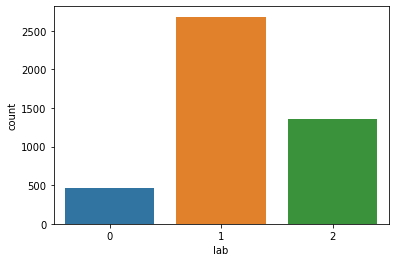

In [27]:
import seaborn as sns

sns.countplot(x ='lab', data = data)

In [28]:
import transformers

from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

In [29]:
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
sample_txt = 'When was I last outside? I am stuck at home for 2 weeks.'

In [30]:
tokens = tokenizer.tokenize(sample_txt)

token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')

print(f'   Tokens: {tokens}')

print(f'Token IDs: {token_ids}')

 Sentence: When was I last outside? I am stuck at home for 2 weeks.
   Tokens: ['When', 'was', 'I', 'last', 'outside', '?', 'I', 'am', 'stuck', 'at', 'home', 'for', '2', 'weeks', '.']
Token IDs: [1332, 1108, 146, 1314, 1796, 136, 146, 1821, 5342, 1120, 1313, 1111, 123, 2277, 119]


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

df_train, df_val = train_test_split(data, test_size=0.1, random_state=42069)

In [32]:
len(df_train)

4059

In [33]:
len(df_val)

452

In [34]:
class Datamodule(nn.Module):
    def __init__(self, df, tokenizer):
        super().__init__()
        self.df = df

        self.img_transforms = transforms.Compose([transforms.Resize(256),
                                                  transforms.CenterCrop(224),
                                                  transforms.ToTensor(), 
                                                  transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                       std=[0.229, 0.224, 0.225])])
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.df)
    
    def __augment__(self, image, text):
        mentions = re.compile(r"^@\S+|\s@\S+")
        urls = re.compile(r"https?://\S+")
        image = self.img_transforms(image)
        text = re.sub(r'http\S+', '', text)
        text = text.replace("#", "").replace("_", " ")
        text = mentions.sub(' entity', text)
        return image, text.strip()
        

    def __getitem__(self, idx):
        img_path = self.df.iloc[idx]['img_path']
        txt_path = self.df.iloc[idx]['txt_path']
        label = self.df.iloc[idx]['lab']

        image = Image.open(img_path).convert('RGB')
        
        f = open(txt_path, 'rb')
        text = f.read()
        text = text.decode('utf-8', errors = 'ignore')
        
        image, text = self.__augment__(image, text)
        
#         encoding = self.tokenizer.encode_plus(text,
#                                               None,
#                                               add_special_tokens=True,
#                                               max_length=90,
#                                               truncation=True,
#                                               pad_to_max_length=True,
#                                               return_token_type_ids=False,
#                                               return_attention_mask=True,
#                                               return_tensors='pt',
#                                             )
        
        encoding = self.tokenizer.encode_plus(text,
                                              add_special_tokens=True,
                                              max_length=90,
                                              truncation = True,
                                              return_token_type_ids=False,
                                              pad_to_max_length=True,
                                              return_attention_mask=True,
                                              return_tensors='pt',
                                             )
        
        return image, text, encoding['input_ids'].flatten(), encoding['attention_mask'].flatten(), label

In [35]:
from torch.utils.data import Dataset, DataLoader

tdm = Datamodule(df_train, tokenizer)
#print(tdm[0])
train_data_loader = DataLoader(tdm, batch_size = 4, shuffle = True, num_workers = 4, drop_last = True)
vdm = Datamodule(df_val, tokenizer)
val_data_loader = DataLoader(vdm, batch_size = 4, shuffle = True, num_workers = 4, drop_last = True)

In [36]:
for a, b, c, d, e in train_data_loader:
    break
print(a.shape, c.shape, d.shape, e.shape)

torch.Size([4, 3, 224, 224]) torch.Size([4, 90]) torch.Size([4, 90]) torch.Size([4])


In [37]:
e.cuda()

tensor([1, 1, 2, 1], device='cuda:0')

In [38]:
from torchvision.models.resnet import resnet101
from torchvision import models

In [39]:
class SentimentClassifier(nn.Module):
    
    def __init__(self, n_classes = 3):
        super(SentimentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
        
        self.model1 = resnet101(pretrained = True)
        
        self.model_file2 = 'resnet101_places_best.pth.tar'
        self.model2 = models.__dict__['resnet101'](pretrained=False, num_classes=365)
        self.checkpoint = torch.load(self.model_file2, map_location=lambda storage, loc: storage)
        self.state_dict = {str.replace(k,'module.',''): v for k,v in self.checkpoint['state_dict'].items()}
        self.model2.load_state_dict(self.state_dict)
        
        self.model_file3 = 'best_emo_resnet50.pt'
        self.model3 = models.__dict__['resnet50'](pretrained=False, num_classes=8)
        self.model3.load_state_dict(torch.load(self.model_file3))
        
        self.drop = nn.Dropout(p=0.2)
        
        self.out1 = nn.Sequential(*[nn.Linear(self.bert.config.hidden_size, 128),
                                    nn.BatchNorm1d(128),
                                    nn.ReLU()])
        
        self.out2 = nn.Sequential(*[nn.Linear(1000, 128),
                                    nn.BatchNorm1d(128),
                                    nn.ReLU(),])
        
        self.out3 = nn.Sequential(*[nn.Linear(365, 128),
                                    nn.BatchNorm1d(128),
                                    nn.ReLU(),])
        
        self.out4 = nn.Sequential(*[nn.Linear(8, 128),
                                    nn.BatchNorm1d(128),
                                    nn.ReLU(),])
        
        self.catr = nn.Sequential(*[nn.Linear(3*128, 128),
                                    nn.BatchNorm1d(128),
                                    nn.ReLU(),])
        
        self.catf = nn.Linear(256, n_classes)

    def forward(self, image, input_ids, attention_mask):

        _, pooled_output = self.bert(input_ids=input_ids, attention_mask=attention_mask, return_dict=False)

        output_bert = self.drop(pooled_output)
        
        lin_bert = self.out1(output_bert)
        
        x1 = self.model1(image)
        lin_res1 = self.out2(x1)
        
        x2 = self.model2(image)
        lin_res2 = self.out3(x2)
        
        x3 = self.model3(image)
        lin_res3 = self.out4(x3)
        
        res_out = self.catr(torch.cat((lin_res1, lin_res2, lin_res3), 1))
        
        concated = torch.cat((res_out, lin_bert), 1)

        return self.catf(concated)

In [40]:
model = SentimentClassifier()
model = model.cuda()

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [41]:
model

SentimentClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affin

In [42]:
import torch.nn.functional as F
from torch.optim.lr_scheduler import CosineAnnealingLR

In [43]:
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)

scheduler = scheduler = CosineAnnealingLR(optimizer, 1000)

loss_fn = nn.CrossEntropyLoss().cuda()

In [44]:
def train_epoch(model, data_loader, loss_fn, optimizer, scheduler, n_examples):
    model = model.train()

    losses = []

    correct_predictions = 0

    for a, b, c, d, e in data_loader:
        image = a.cuda()
        input_ids = c.cuda()
        attention_mask = d.cuda()
        targets = e.cuda()

        outputs = model(image = image, input_ids=input_ids, attention_mask=attention_mask)

        _, preds = torch.max(outputs, dim=1)

        loss = loss_fn(outputs, targets)

        correct_predictions += torch.sum(preds == targets)

        losses.append(loss.item())

        loss.backward()

        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()

        scheduler.step()

        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

In [45]:
def eval_model(model, data_loader, loss_fn, n_examples):
    model = model.eval()
    losses = []

    correct_predictions = 0

    with torch.no_grad():
        for a, b, c, d, e in data_loader:
            image = a.cuda()
            input_ids = c.cuda()
            attention_mask = d.cuda()
            targets = e.cuda()

            outputs = model(image = image, input_ids=input_ids, attention_mask=attention_mask)

            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)
            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)

In [46]:
model_best = SentimentClassifier()
model_best = model_best.cuda()

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [47]:
best_acc = 0.00

for epoch in range(40):
    print(f'Epoch {epoch + 1}/{40}')

    print('-' * 40)

    train_acc, train_loss = train_epoch(model, train_data_loader, loss_fn, optimizer, scheduler, len(df_train))
    print(f'Train loss {train_loss} accuracy {train_acc}')
    
    val_acc, val_loss = eval_model(model, val_data_loader, loss_fn, len(df_val))

    print(f'Val   loss {val_loss} accuracy {val_acc}')
    
    if(val_acc > best_acc):
        model_best = copy.deepcopy(model)
        best_acc = val_acc

Epoch 1/40
----------------------------------------
Train loss 0.8805851406129389 accuracy 0.600640551860064
Val   loss 0.7849833040902044 accuracy 0.6482300884955752
Epoch 2/40
----------------------------------------
Train loss 0.7867646840285267 accuracy 0.6553338260655334
Val   loss 0.8086277016364367 accuracy 0.6946902654867256
Epoch 3/40
----------------------------------------
Train loss 0.7333054508301163 accuracy 0.7001724562700172
Val   loss 0.6934448638848499 accuracy 0.7212389380530974
Epoch 4/40
----------------------------------------
Train loss 0.6853812990868116 accuracy 0.715939886671594
Val   loss 0.7555474997951394 accuracy 0.6902654867256637
Epoch 5/40
----------------------------------------
Train loss 0.6373249283776834 accuracy 0.7408228627740823
Val   loss 0.751171330797725 accuracy 0.7234513274336283
Epoch 6/40
----------------------------------------
Train loss 0.5515148984874494 accuracy 0.779009608277901
Val   loss 0.8142163257600855 accuracy 0.6792035398230

In [67]:
def get_predictions(model, data_loader):
    model = model.eval()
    predictions = []
    real_values = []

    with torch.no_grad():
        for a, b, c, d, e in data_loader:
            image = a.cuda()
            texts = b
            input_ids = c.cuda()
            attention_mask = d.cuda()
            targets = e.cuda()
            
            outputs = model(image = image, input_ids=input_ids, attention_mask=attention_mask)

            _, preds = torch.max(outputs, dim=1)

            predictions.extend(preds)

            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()

    real_values = torch.stack(real_values).cpu()

    return predictions, real_values

In [49]:
y_pred, y_test = get_predictions(model_best, val_data_loader)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.19      0.27        48
           1       0.76      0.87      0.81       269
           2       0.67      0.61      0.64       135

    accuracy                           0.72       452
   macro avg       0.63      0.56      0.57       452
weighted avg       0.70      0.72      0.70       452



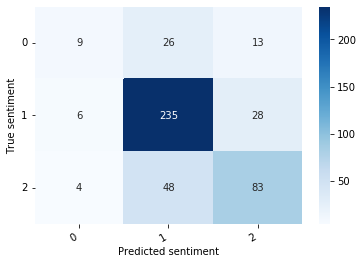

In [50]:
import seaborn as sns

def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment')
    plt.xlabel('Predicted sentiment')
    
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)

show_confusion_matrix(df_cm)

In [83]:
test_data = pd.read_csv('test_en.csv')
test_data = test_data.drop(test_data.filter(regex="Unname"),axis=1)
test_data

,img_path,txt_path,lab
0,NLP_data/data/1.jpg,NLP_data/data/1.txt,1
1,NLP_data/data/2.jpg,NLP_data/data/2.txt,1
2,NLP_data/data/3.jpg,NLP_data/data/3.txt,1
3,NLP_data/data/4.jpg,NLP_data/data/4.txt,1
4,NLP_data/data/5.jpg,NLP_data/data/5.txt,1
...,...,...,...
92,NLP_data/data/96.jpg,NLP_data/data/96.txt,1
93,NLP_data/data/97.jpg,NLP_data/data/97.txt,1
94,NLP_data/data/98.jpg,NLP_data/data/98.txt,1
95,NLP_data/data/99.jpg,NLP_data/data/99.txt,1


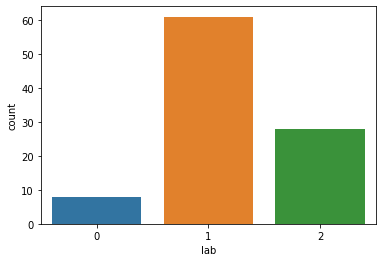

In [92]:
sns.countplot(x ='lab', data = test_data)

In [88]:
dm = Datamodule(test_data, tokenizer)
test_data_loader = DataLoader(dm, batch_size = 4, shuffle = True, num_workers = 4, drop_last = True)

In [89]:
for epoch in range(10):
    print(f'Epoch {epoch + 1}/{10}')

    print('-' * 40)

    test_acc, test_loss = eval_model(model_best, test_data_loader, loss_fn, len(test_data))
    print(f'Test   loss {test_loss} accuracy {test_acc}')

Epoch 1/10
----------------------------------------
Val   loss 0.507097008327643 accuracy 0.865979381443299
Epoch 2/10
----------------------------------------
Val   loss 0.46131846906306845 accuracy 0.8762886597938144
Epoch 3/10
----------------------------------------
Val   loss 0.5081511274911463 accuracy 0.865979381443299
Epoch 4/10
----------------------------------------
Val   loss 0.5080207311548293 accuracy 0.865979381443299
Epoch 5/10
----------------------------------------
Val   loss 0.5052758983025948 accuracy 0.865979381443299
Epoch 6/10
----------------------------------------
Val   loss 0.5072445988965532 accuracy 0.865979381443299
Epoch 7/10
----------------------------------------
Val   loss 0.5080588259734213 accuracy 0.865979381443299
Epoch 8/10
----------------------------------------
Val   loss 0.5079440174934765 accuracy 0.865979381443299
Epoch 9/10
----------------------------------------
Val   loss 0.4993766813228528 accuracy 0.8762886597938144
Epoch 10/10
-----

In [90]:
y_pred, y_test = get_predictions(model_best, test_data_loader)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.87      0.98      0.92        60
           2       0.93      0.89      0.91        28

    accuracy                           0.89        96
   macro avg       0.93      0.67      0.68        96
weighted avg       0.90      0.89      0.86        96



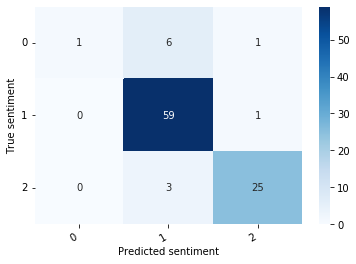

In [91]:
test_cm = confusion_matrix(y_test, y_pred)
test_cm = pd.DataFrame(test_cm)

show_confusion_matrix(test_cm)